
Colorimetric observer models
============================

Alphaopic irradiance&mdash;the ammount of incident light that is 'seen' by individual photoreceptor classes&mdash;is a core computation for silent substitution. It is calculated by weighting a spectrum by estimates of the photoreceptor spectral sensetivites via a simple dot product operation.

![aopic irradiance](../../img/alphaopic_irradiance.svg)
The shape of the spectral sensitivity curves are determined 

The spectral sensitivity curves are derived from years of research, and available from a website maintained by the [UCL Colour Vision Research Laboratory](http://www.cvrl.org/). 

The problem is that this varies between individuals. 

Before incident light hits retinal photoreceptors it first travels through the lens and other ocular media. The lens naturally yellows with age due to absorption of UV irradiantion, and the p. This means that everyone has 




Photoreceptor action spectra are estimated from microspectrophotometry, colour matching, etc.

Individual differences
----------------------
Foster paper 2016

### Lens pigment density

As we age, the lens and other ocular media absorb UV light and turn yellow. This acts as a prereceptoral filter on the light coming in, which in turn affects the response of the underlying photoreceptors. 

<img src="../../img/lensesAge.jpg" width="200" height="200" /><img src="../../img/fundus.png" width="200" height="200" />

<figure>
<img src="../../img/fundus.png" alt="Fundus" width="200">
  <figcaption>Human fundus diagram.</figcaption>
</figure> 



### Macula pigment density

The mucular lutea is the part of the retina that we point at whatever we want to see.

<figure>
<img src="../../img/fundus.png" alt="Fundus" width="200">
  <figcaption>Human fundus diagram.</figcaption>
</figure> 

Two options. Use 




`pysilsub.observers.StandardColorimetricObserver`
-------------------------------------------------

The International Comission on Illumination (CIE) describes a standard observer model.

<AxesSubplot:xlabel='Wavelength (nm)', ylabel='Spectral sensetivity'>

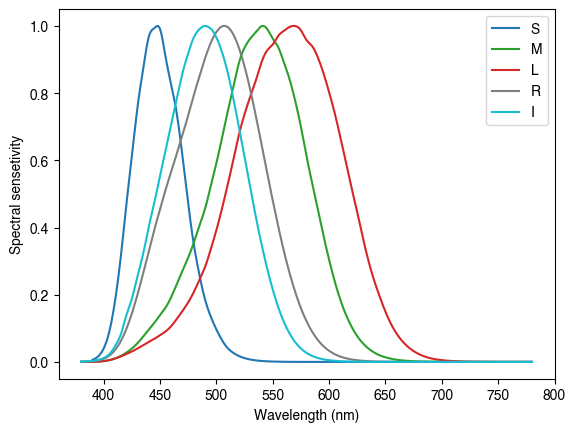

In [1]:
from pysilsub import observers 

observer = observers.StandardColorimetricObserver()
observer.plot_action_spectra()


`pysilsub.observers.IndividualColorimetricObserver`
---------------------------------------------------

Adjust action spectra for age and field size.

<AxesSubplot:xlabel='Wavelength (nm)', ylabel='Spectral sensetivity'>

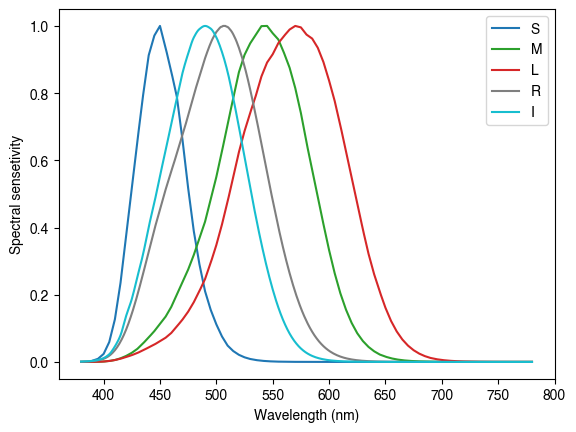

In [2]:
observer = observers.IndividualColorimetricObserver(age=60, field_size=10)
observer.plot_action_spectra()